# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

In [3]:
%matplotlib inline                    
import numpy as np                          # Numpy is a library mainly used for working with arrays
import pandas as pd                         # Pandas is a Python library mainly used for working with data sets 
import matplotlib.pyplot as plt             # Matplot lib is used for plotting, in this case pyplot will be used to create a scatter plot
 

dataset = pd.read_csv("HSE_Salary.csv")     # Variable called dataset is now assigned the values of csv "HSE_Salary.csv" file

dataset.head()                              # This function acts as a test to see did the file upload correctly, if so it will display the first 5 rows of data

,Index,Grade Description,Pay
0,1,PHLEBOTOMIST TRAINEE,20767
1,2,STUDENT MENTAL HEALTH NURSE\n(ROSTERED PLACEMENT),22729
2,3,"E.C.G. TECHNICIAN, STUDENT",24451
3,4,PHARMACY STUDENT,25398
4,5,"PHARMACEUTICAL TECHNICIAN, STUDENT",25913


In [63]:
dataset.tail()                          # This function shows the last 5 rows of data and is included to show the highest salaries and job titles in the dataset
                                        # note that the data is actual but some of it is redundant and has been replaced by a more recent salary scale

,Index,Grade Description,Pay
437,438,"NATIONAL DIRECTOR, INTERNAL AUDIT (HSE)",156072
438,439,GENERAL MANAGER (CORK UNIVERSITY\nHOSPITAL)(GA...,156072
439,440,CHIEF EXECUTIVE (BEAUMONT)(ST. JAMES)(ST.\nVIN...,156072
440,441,NATIONAL DIRECTOR OF CORPORATE PLANNING\nAND C...,156072
441,442,HEALTH BOARD AREA CHIEF OFFICER (HSE\nEASTERN ...,160506


numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

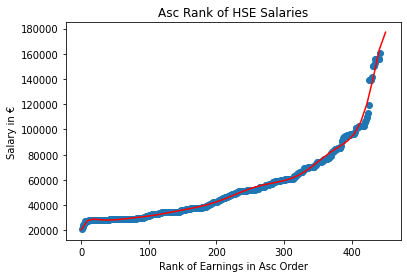

In [122]:
index = dataset["Index"]
salaries = dataset["Pay"]
x = np.array(index)
y = np.array(salaries)

fit_xy = np.polyfit(x, y, 12)            # This function takes 2 arrays, in this case x and y. The third parameter is the number of polynomials you want it to return so that the line best fits your scatter plot
polyNom = np.poly1d(fit_xy)              # This function takes one parameter and returns polynomial formula. We had to fit the x and y variables in the above function in order to pass them to np.poly1d

lineWidth = np.linspace(0,450)           # The linspace() function starts takes a start and end parameter(starts at 0 and ends at 450) There are 441 rows so 450 will cover all with a small bit more.
plt.plot(lineWidth, polyNom(lineWidth), c='r')  # Here we are plotting the line only, 

plt.scatter(index, salaries)
plt.xlabel("Rank of Earnings in Asc Order")
plt.ylabel("Salary in €")
plt.title("Asc Rank of HSE Salaries")
plt.show()



Looks pretty good! Let's measure the r-squared error:

In [120]:
from sklearn.metrics import r2_score

r2 = r2_score(y, polyNom(x))

print(r2)


0.99363108928012
